**1.1.1. (a) 
For each of the polynomial bases of dimension k = 1,2,3,4, fit the data set of Figure 1
{(1, 3), (2, 2), (3, 0), (4, 5)} and superimpose their plots:**<br>

**The matrix form of the least squares solution (as given in slide#31 of week 1 slides):<br><br>**

$\textbf{w} = (\textbf{X}^\textbf{T}\textbf{X})^{-1}\textbf{X}^T\textbf{y}$

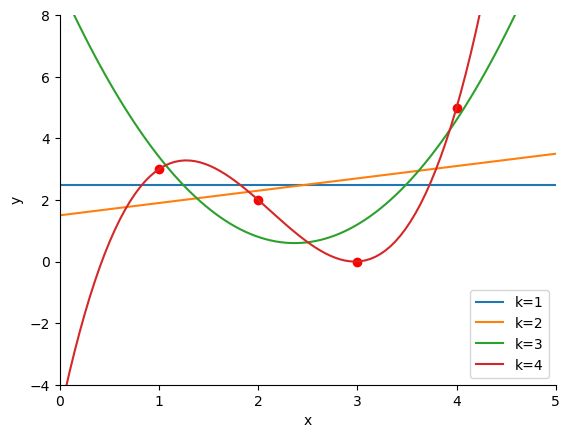

In [307]:
import numpy as np
from matplotlib import pyplot as plt

def transform_dataset_by_polynom_basis_k1_to_k4(x: list) -> list:
    """
    Build the 4 polynomial function input values for the independent variable x, for each of the 4 basis variable from k=1 to k=4.
    :param x: The given independent variable values.
    :return: Four polynomial input values for k=1, k=2, k=3, k=4.
    """
    X_1 = np.ones((len(x), 1)) # k=1 gives x^0, so filled with 1s. This is the bias term (i.e. y-intercept).
    X_2 = np.array(x).reshape(-1, 1) # k=2
    X_2 = np.column_stack((X_1, X_2))
    X_3 = np.array([x_**2 for x_ in x]).reshape(-1, 1) # k=3
    X_3 = np.column_stack((X_2, X_3))
    X_4 = np.array([x_**3 for x_ in x]).reshape(-1, 1) # k=4
    X_4 = np.column_stack((X_3, X_4))
    return [X_1, X_2, X_3, X_4]

def compute_weights_of_lr_by_least_sqrs(X: list, y, use_pinv=True) -> list:
    """
    Calculate coefficients of linear regression using least squares of given data set.
    This is also referred to as 'training the model'.
    :param X: Independent variable datasets. List of NumPy arrays.
    :param y: Dependent variable values. NumPy array.
    :param use_pinv: True to use (Moore-Penrose) pseudo-inverse matrix instead of explicitly 
                     using (X^t*X)^-1 *X^t*y. True by default.
    :return: Coefficients (aka weights).
    """
    weights = []
    for X_ in X:
        if use_pinv:
            w = np.linalg.pinv(X_)@y
        else:
            X_t = X_.T
            w = np.linalg.inv(X_t @ X_) @ X_t @ y
        weights.append(w.flatten())
    return weights

def predict_with_polynom_func(w: list, x_for_pred) -> list:
    """
    Evaluate polynomial for range of given independent variable values to calculate predicted values of 
    dependent variable using given coefficients.
    Note: NumPy's poly1d() expects x^n + .. + x^1 + x^0, so I need to reverse the order of w_T
    :param w: Weights for polynomial function.
    :param x_for_pred: Independent variable values to use for predicting dependent variable values. NumPy array.
    :return: Predicted values of dependent variable.
    """
    y_preds = []
    for w_ in w:
        w_T_for_np = np.flip(w_.T).flatten()
        y_pred = np.poly1d(w_T_for_np)(x_for_pred)        
        y_preds.append(y_pred)
    return y_preds

def plot_polynoms_k1_k2_k3_k4(x, y, y_preds: list, x_for_plot) -> None:
    """
    :param x: The independent variable (input), NumPy array.
    :param y: The dependent variable (aka label), NumPy array.
    :param y_preds: Predicted values of y for each of the four k values, NumPy array.
    """
    _ , ax = plt.subplots(facecolor='white')
    ax.set_xlim(0, 5)
    ax.set_ylim(-4, 8)
    ax.scatter(x, y, color='red')
    for y_pred, k in zip(y_preds, [1,2,3,4]):
        ax.plot(x_for_plot, y_pred, label=f'k={k}')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend()
    plt.show()

# THE ABOVE PYTHON FUNCTIONS RUN FROM HERE:
dataset_x, dataset_y = [1, 2, 3, 4], [3, 2, 0, 5]
X_k1_k2_k3_k4 = transform_dataset_by_polynom_basis_k1_to_k4(dataset_x)
weights_k1_k2_k3_k4 = compute_weights_of_lr_by_least_sqrs(X_k1_k2_k3_k4, y=np.array([3, 2, 0, 5]).reshape(-1, 1), 
                                                          use_pinv=True)
x_for_pred_and_plot = np.linspace(0, 5, 100)
y_preds = predict_with_polynom_func(weights_k1_k2_k3_k4, x_for_pred = x_for_pred_and_plot)
plot_polynoms_k1_k2_k3_k4(x=dataset_x, y=dataset_y, y_preds=y_preds, x_for_plot=x_for_pred_and_plot)

**1.1.1. (b) Give the equations corresponding to the curves fitted for k = 1, 2, 3.** <br>

**Using the `weights_k1_k2_k3_k4` variable calculated in part (a), the equation is based on:**<br>

$y = w_0x^0 + w_1x^1 + ... +  w_{k-1}x^{k-1}$

In [308]:
print(f'k1_x0 = {float(weights_k1_k2_k3_k4[0][0])}')
print(f'k2_x0 = {float(weights_k1_k2_k3_k4[1][0])}, k2_x1 = {float(weights_k1_k2_k3_k4[1][1])}')
print(f'k3_x0 = {float(weights_k1_k2_k3_k4[2][0])}, k3_x1 = {float(weights_k1_k2_k3_k4[2][1])}, k3_x1 = {float(weights_k1_k2_k3_k4[2][2])}')

k1_x0 = 2.5
k2_x0 = 1.5, k2_x1 = 0.3999999999999998
k3_x0 = 9.000000000000012, k3_x1 = -7.100000000000011, k3_x1 = 1.500000000000001


**Hence, the equation for** $k=1$ is $y = 2.5$, <br>

**the equation for** $k=2$ is $y = 1.5 + 0.4x$, <br>

**the equation for** $k=3$ is $y = 9 - 7.1x + 1.5x^2$.

**1.1.1. (c) Calculate mean squared error (MSE).** <br> 

**(From slide#27 in week 1 slides): the empirical MSE of the linear predictor:** $\hat{y}=\textbf{w}.\textbf{x}$ **on a data sequence** $\textit{S}$ **is, in matrix notation, given by the mean of the least squares, which in matrix form is**:<br>

$\frac{1}{m}(X\textbf{w} - \textbf{y})^\intercal X\textbf{w} - \textbf{y}$ <br>

**There are 4 data samples, so** $m = 4$.

In [309]:
def calculate_MSEs(m: int, X: list, w: list, y: list) -> float:
    """
    Calculate mean squared error for each of the different linear regression model learned by least squares
    for the polynomial functions of different bases.
    :param m: Number of samples in dataset (expecting either 4, 30, or 1000). 
    :param X: List of NumPy arrays. Each array contains transformed datasets of independent variable values, 
              according to the basis.
    :param w: Weights learned by least squares linear regression. List of NumPy arrays.
    :param y: The the dependent variable values corresponding to the independent variables of the dataset.
    :return: The mean squared error.
    """
    MSEs = []
    for i in range(len(X)):
        MSEs.append((1 / m) * (X[i] @ w[i] - y).T @ (X[i] @ w[i] - y))
    return MSEs

MSEs = calculate_MSEs(m=len(dataset_x),X=X_k1_k2_k3_k4, w=weights_k1_k2_k3_k4, y=dataset_y)
for i, MSE in zip([0, 1, 2, 3], MSEs):
    print(f'k={i + 1} MSE = {MSE}')

k=1 MSE = 3.25
k=2 MSE = 3.05
k=3 MSE = 0.8000000000000008
k=4 MSE = 9.883638281514057e-27


**1.1.2. (a) i. Generate dataset using:** $g_{\sigma}(x) := \sin^2{(2 \pi x)} + \epsilon$ **and superimpose with a plot of the same function without** $\epsilon$ **(noise) added.** 

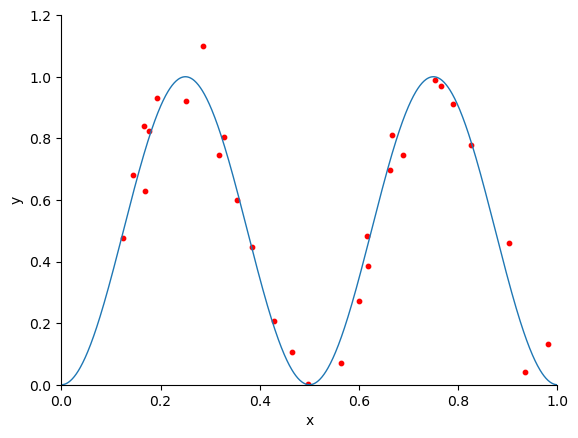

In [310]:
def sin_sqrd_2pi_x(x: float) -> float:
    """
    Apply sine(2*pi*x)^2 to given input number.
    :param x: Input number
    :return: Output number, a function of input.
    """
    return np.square(np.sin(2 * np.pi * x))

def g_0p07(x: float) -> float:
    """
    Apply sine(2*pi*x)^2 with random normally-distributed noise to given input number, 
    using standard deviation of 0.07.
    :param x: Input number.
    :return: Output number, a function of input.
    """
    mean, std_dev, num_of_samples = 0, 0.07, 1
    epsilon = np.random.normal(loc=mean, scale=std_dev, size=num_of_samples)
    epsilon = float(epsilon[0])
    return sin_sqrd_2pi_x(x) + epsilon

def generate_dataset_about_g(num_of_data_pairs: int) -> tuple:
    """
    Generate dataset of given number of independent variables sampled uniformly from 
    interval [0, 1] and corresponding dependent variables
    :return: Dataset S, a NumPy array and list.
    """
    x = np.random.uniform(0, 1, num_of_data_pairs)
    y = [g_0p07(x_) for x_ in x]
    return x, y

def plot_g_0p07_and_sin_sqrd_2pi_x(x, y, x_for_plot):
    _ , ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.2)
    ax.scatter(x, y, color='red', s=10)
    y_func=[sin_sqrd_2pi_x(x_) for x_ in x_for_plot]
    ax.plot(x_for_plot, y_func, linewidth=1)
    plt.xlabel('x')
    plt.ylabel('y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

g_dataset_30x, g_dataset_30y = generate_dataset_about_g(num_of_data_pairs=30)
plot_g_0p07_and_sin_sqrd_2pi_x(x=g_dataset_30x, y=g_dataset_30y, x_for_plot=np.linspace(0, 1, 1000))

**1.1.2. (a) ii. Fit dataset to polynomial bases k=2, 5, 10, 14 and 18.** <br>

**Superimpose their plots to (maybe) observe overfitting with increasing number of dimensions:** 

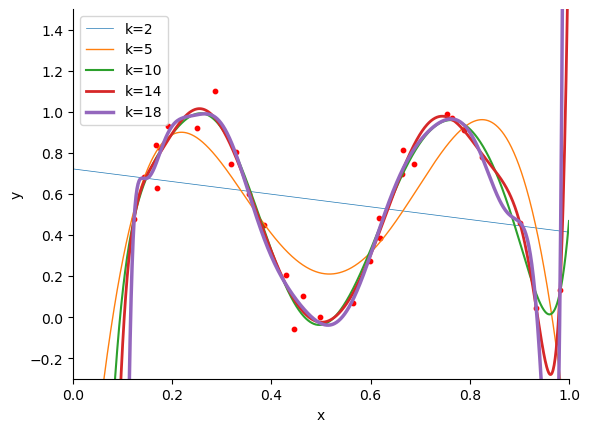

In [311]:
def transform_dataset_by_polynom_basis_k18(x: list) -> list:
    """
    Build polynomial function input values for independent variable x, for every basis up to 18.
    (The other 4 basis vectors (k = 2, 5, 10 and 14) are then sliced from this).
    :param x: The given independent variable values.
    :return: Four polynomial input values for k=2, k=5, k=10, k=14, k=18.
    """
    X_k18 = np.column_stack((np.ones((len(x), 1)), np.array(x).reshape(-1, 1)))
    for k in range(3, 19):
        X_k18 = np.column_stack((X_k18, np.array([x_**(k - 1) for x_ in x]).reshape(-1, 1)))
    return X_k18


def plot_polynom_k2_k5_k10_k14_k18(x, y, y_preds, x_for_plot):
    _ , ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.3, 1.5)
    ax.scatter(x, y, color='red', s=10)
    linewidth=0.5
    for y_pred, k in zip(y_preds, [2,5,10,14,18]):
        ax.plot(x_for_plot, y_pred, label=f'k={k}', linewidth=linewidth)
        linewidth += 0.5

    plt.xlabel('x')
    plt.ylabel('y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend()
    plt.show()

X_k18_30 = transform_dataset_by_polynom_basis_k18(x=g_dataset_30x)
weights_k2_k5_k10_k14_k18 = compute_weights_of_lr_by_least_sqrs([X_k18_30[:,:2], X_k18_30[:,:5],
                                                                    X_k18_30[:,:10],X_k18_30[:,:14],
                                                                    X_k18_30], g_dataset_30y)
x_for_pred_and_plot = np.linspace(0, 1, 1000)
y_preds = predict_with_polynom_func(weights_k2_k5_k10_k14_k18, x_for_pred = x_for_pred_and_plot)
plot_polynom_k2_k5_k10_k14_k18(x=g_dataset_30x, y=g_dataset_30y, y_preds=y_preds, x_for_plot = x_for_pred_and_plot)

**1.1.2. (b) Calculate training set error of dataset S  $te_k(S)$ and plot its natural log against k to observe reduction in training error with increasing dimensions.**

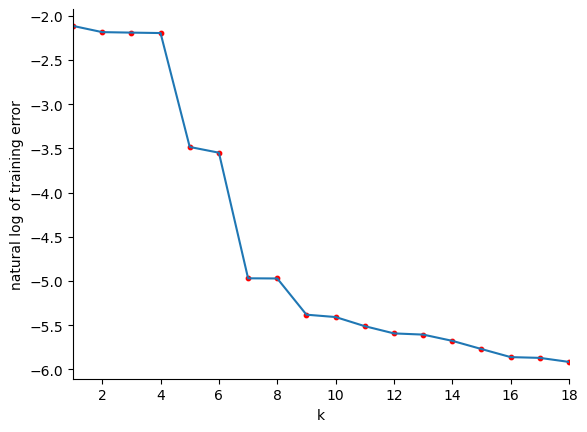

In [320]:
def compute_training_errors_polynom() -> tuple:
    g_dataset_30x, g_dataset_30y = generate_dataset_about_g(num_of_data_pairs=30)
    X_k18_30 = transform_dataset_by_polynom_basis_k18(x=g_dataset_30x)
    X_k1_to_k18_30 = [X_k18_30[:,:i] for i in range(1, 19)]
    weights_k1_to_k18 = compute_weights_of_lr_by_least_sqrs(X=X_k1_to_k18_30, y=g_dataset_30y)
    training_errors_k1_to_k18 = calculate_MSEs(m=len(g_dataset_30x), X=X_k1_to_k18_30, 
                                               w=weights_k1_to_k18, y=g_dataset_30y)
    return weights_k1_to_k18, training_errors_k1_to_k18

def plot_log_error_vs_k(k, log_error, train_or_test='training'):
    _ , ax = plt.subplots()
    ax.set_xlim(1, 18)
    # ax.set_ylim(-5,0)
    ax.scatter(k, log_error, color='red', s=10)
    ax.plot(k, log_error)
    plt.xlabel('k')
    plt.ylabel(f'natural log of {train_or_test} error')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# weights_k1_to_k18 will be used for making predictions in test set.
weights_k1_to_k18, training_errors_k1_to_k18 = compute_training_errors_polynom()
plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(training_errors_k1_to_k18))


**1.1.2. (c) Calculate test set error of (larger) dataset T  $tse_k(T)$ using model weights from linear regression of training dataset.** <br>

**Plot its natural log against k to observe how with increasing dimensions (leading to overfiting), the model is essentially starting to fit the noise.**

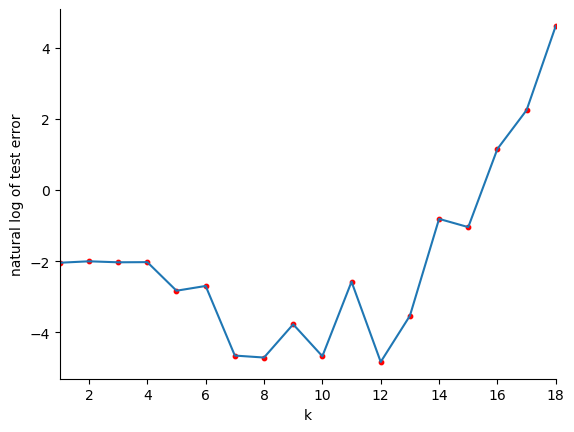

In [321]:
def compute_test_errors_polynom(w: list) -> list:
    g_dataset_1000x, g_dataset_1000y = generate_dataset_about_g(num_of_data_pairs=1000)
    X_k18_1000 = transform_dataset_by_polynom_basis_k18(x=g_dataset_1000x)
    X_k1_to_k18_1000 = [X_k18_1000[:,:i] for i in range(1, 19)]
    return calculate_MSEs(m=len(g_dataset_1000x), X=X_k1_to_k18_1000, w=w, y=g_dataset_1000y)

plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(compute_test_errors_polynom(w=weights_k1_to_k18)), 
                    train_or_test='test')

# NOTE: POSSIBLE CHANGE IN Y-AXIS RANGE

**1.1.2. (d) Repeat parts (b) and (c) but average over 100 epochs.**

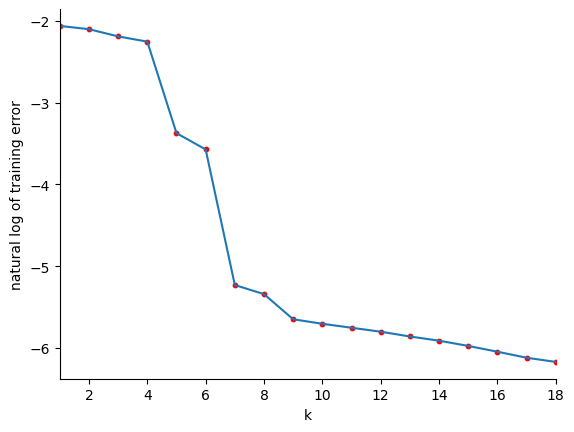

In [322]:
training_errors_k1_to_k18_list = []
weights_k1_to_k18_list = []

for _ in range(100):
    weights_k1_to_k18, training_errors_k1_to_k18 = compute_training_errors_polynom()
    training_errors_k1_to_k18_list.append(training_errors_k1_to_k18)
    weights_k1_to_k18_list.append(weights_k1_to_k18)

# weights_k1_to_k18 = np.mean(weights_k1_to_k18_list, axis=0)

plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(np.mean(training_errors_k1_to_k18_list, axis=0)))


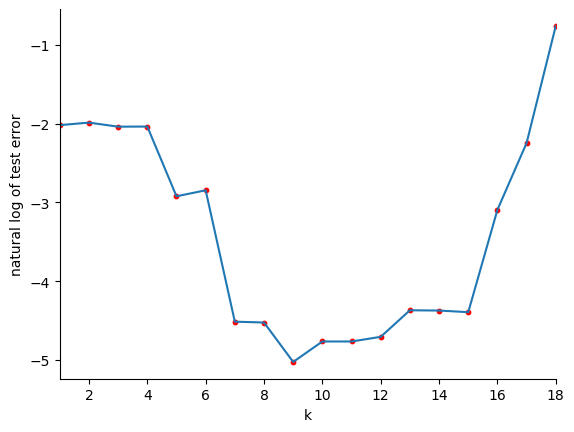

In [323]:
test_errors_k1_to_k18_list = []

# print(weights_k1_to_k18.shape)

for _ in range(100):
    test_errors_k1_to_k18 = compute_test_errors_polynom(weights_k1_to_k18)
    test_errors_k1_to_k18_list.append(test_errors_k1_to_k18)
    
plot_log_error_vs_k(k=list(range(1, 19)), 
                    log_error=np.log(np.mean(test_errors_k1_to_k18_list, axis=0)), train_or_test='test')


**1.1.3. Repeat 2 (b)-(d) but use basis** (for $k=1, ..., 18$): $ \{\sin(1\pi x), \sin(2\pi x)\, \sin(3\pi x), ..., \sin(k\pi x)\} $

**Hence, calculate training errors and plot against k, calculate test errors and plot against k, and repeat but with average of 100 epochs.**

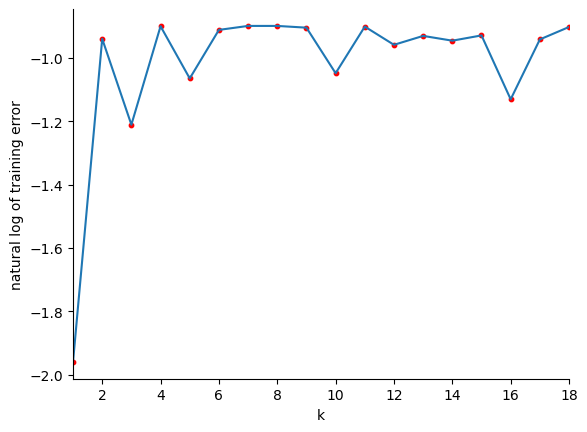

In [324]:
def transform_dataset_by_sine_bases_k18(x: list) -> list:
    X_k1_to_k18_list = []
    X_k1_to_k18_list.append(np.array([np.sin(1 * np.pi * x_) for x_ in x]).reshape(-1, 1))
    for k in range(2, 19):
#         temp_ary = np.array([np.sin(k * np.pi * x_) for x_ in x]).reshape(-1,1)
#         X_k1_to_k18_list.append(temp_ary)
        X_k1_to_k18_list.append(np.array([np.sin(k * np.pi * x_) for x_ in x]).reshape(-1,1))
    return X_k1_to_k18_list

def compute_training_errors_sine() -> tuple:
    g_dataset_30x, g_dataset_30y = generate_dataset_about_g(num_of_data_pairs=30)
    X_k1_to_k18_30 = transform_dataset_by_sine_bases_k18(x=g_dataset_30x)
    weights_k1_to_k18 = compute_weights_of_lr_by_least_sqrs(X=X_k1_to_k18_30, y=g_dataset_30y)
    training_errors_k1_to_k18 = calculate_MSEs(m=len(g_dataset_30x), X=X_k1_to_k18_30, 
                                               w=weights_k1_to_k18, y=g_dataset_30y)
    return weights_k1_to_k18, training_errors_k1_to_k18

weights_k1_to_k18, training_errors_k1_to_k18 = compute_training_errors_sine()
plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(training_errors_k1_to_k18))


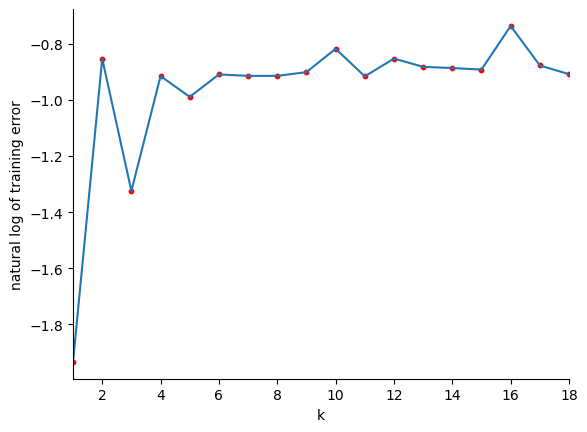

In [325]:
def compute_test_errors_sine(w: list) -> list:
    g_dataset_1000x, g_dataset_1000y = generate_dataset_about_g(num_of_data_pairs=1000)
    X_k1_to_k18_1000 = transform_dataset_by_sine_bases_k18(x=g_dataset_1000x)
    test_errors_k1_to_k18 = calculate_MSEs(m=len(g_dataset_1000x), X=X_k1_to_k18_1000, w=w, y=g_dataset_1000y)
    return test_errors_k1_to_k18

test_errors_k1_to_k18 = compute_test_errors_sine(w=weights_k1_to_k18)
plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(test_errors_k1_to_k18))


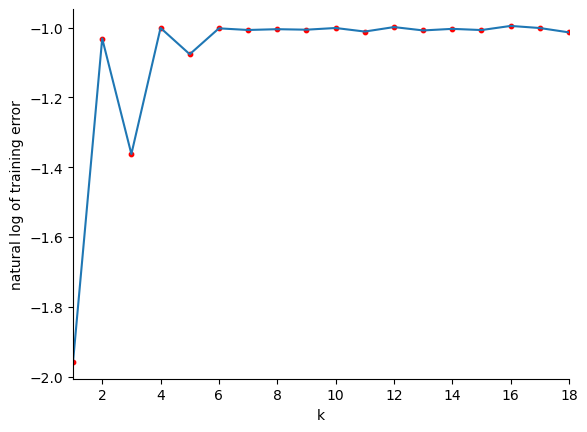

In [326]:
training_errors_k1_to_k18_list = []
weights_k1_to_k18_list = []

for _ in range(100):
    weights_k1_to_k18, training_errors_k1_to_k18 = compute_training_errors_sine()
    training_errors_k1_to_k18_list.append(training_errors_k1_to_k18)
    weights_k1_to_k18_list.append(weights_k1_to_k18)

# weights_k1_to_k18 = np.mean(weights_k1_to_k18_list, axis=0) # heterogenous array size, so would need more complicated logic to compute means of weights.

plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(np.mean(training_errors_k1_to_k18_list, axis=0)))


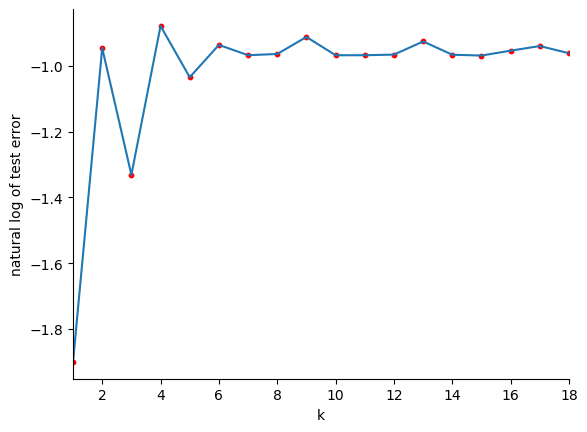

In [327]:
test_errors_k1_to_k18_list = []

# print(weights_k1_to_k18.shape)

for _ in range(100):
    test_errors_k1_to_k18 = compute_test_errors_sine(weights_k1_to_k18)
    test_errors_k1_to_k18_list.append(test_errors_k1_to_k18)
    
plot_log_error_vs_k(k=list(range(1, 19)), 
                    log_error=np.log(np.mean(test_errors_k1_to_k18_list, axis=0)), train_or_test='test')
